# **YULU Casestudy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import ttest_ind # T-test for independent samples

In [ ]:
dt = pd.read_csv('yulu.csv')

# About the Dataset:

   - datetime: datetime
   - season: season (1: spring, 2: summer, 3: fall, 4: winter)
   - holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
   - workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
   - weather:
        1. Clear, Few clouds, partly cloudy, partly cloudy
        2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
   - temp: temperature in Celsius
   - atemp: feeling temperature in Celsius
   - humidity: humidity
   - windspeed: wind speed
   - casual: count of casual users
   - registered: count of registered users
   - count: count of total rental bikes including both casual and registered


In [ ]:
dt.head(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
dt.shape

(10886, 12)

# **Checking Null Values**

let's look at each individual variables, Let's start with humidity:
  -

In [ ]:
print(dt['humidity'].max(),dt['humidity'].min())

100 0


- So we are seeing all kind of humidity levels from 100 to 0.
- Humidity <= 55, refers to dry & comfortable conditions.
- Humidity > 55 & < 65, becomes sticky & muggy.
- More than 65, refers to lot's of moisture in the air.

In [ ]:
print(dt['datetime'].min(),dt['datetime'].max())

2011-01-01 00:00:00 2012-12-19 23:00:00


Okay, We have data of two years from `2011 Jan` to `2012 December.`

In [ ]:
dt['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [ ]:
dt['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
dt['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [ ]:
df = dt.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['date'] = df['datetime'].astype('datetime64[ns]')

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
dtype: int64

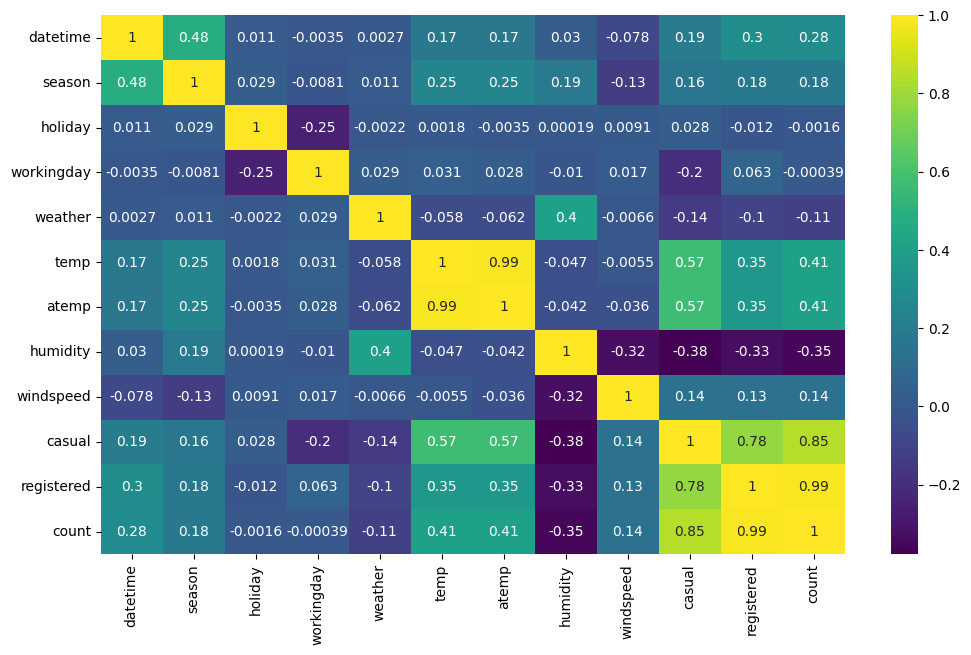

In [ ]:
# Let's use Correlation Heatmap
# Convert the datetime column to Unix timestamps
import pandas as pd

# Convert the datetime column to Unix timestamps
dt['datetime'] = pd.to_datetime(dt['datetime']).apply(pd.Timestamp.timestamp)

# Create the correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(dt.corr(method='spearman'),
            annot=True, cmap='viridis')
plt.show()

from above table we can verify some points:
- temperature or aparent temprature and temp are highly correlated, as they are most of the times approximately the same.
- count, causal, registered are all correlated to each other because all of them are linked as per: causal + registered = count

# Checking for outlier's

In [ ]:
df1 = dt.copy()

In [ ]:
n = df1.drop(columns=['casual', 'registered', 'atemp'])

In [ ]:
col_list = ['workingday',	'holiday',	'weather', 'season']

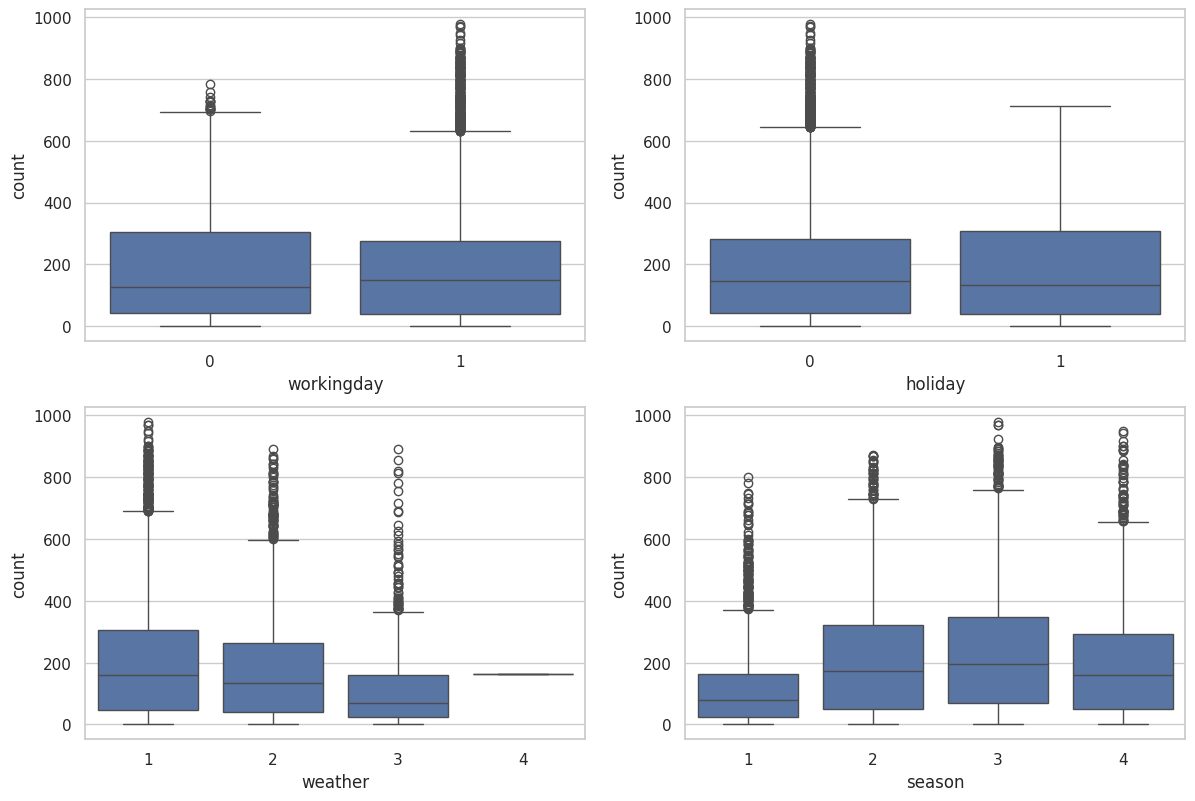

In [ ]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(8, 25))
fig.subplots_adjust(right=1.5)

for plot in range(1, len(col_list)+1):
    plt.subplot(5, 2, plot)
    sns.boxplot(x=n[col_list[plot-1]], y=n['count'])
plt.show()
# Using boxplot to detect outlier's.

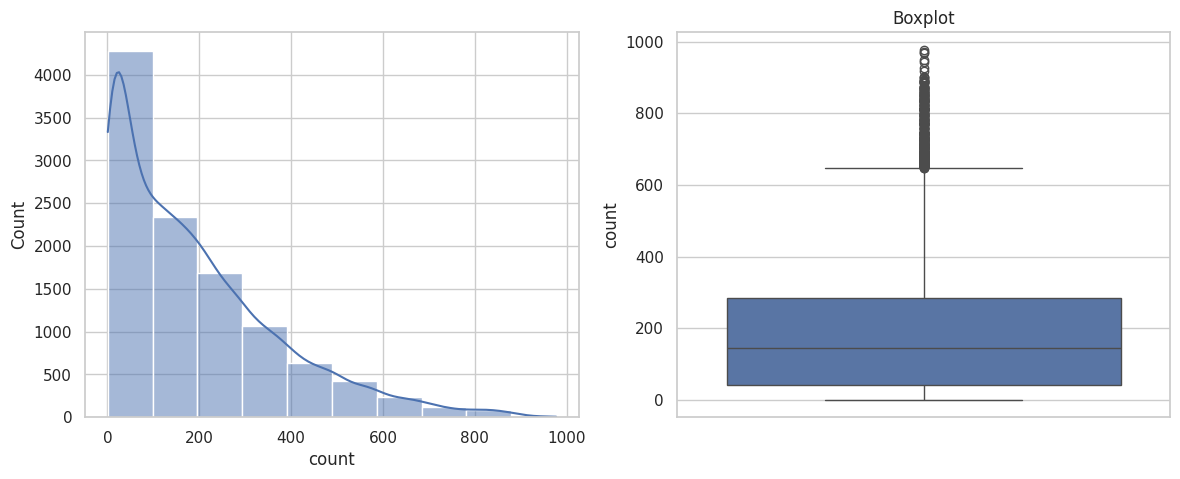

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(n['count'], bins=10,kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(y=n['count'])
plt.title('Boxplot')
plt.show()

- Count distribution shows that, it is a Right Skewed Distribution.
- Also their are many outlier's.

Based on information we learned,
- These outlier's are important to understand the specific trends.
- Log transformation seems a better option rather than using IQR to remove the outlier's. which will defeat our purpose.

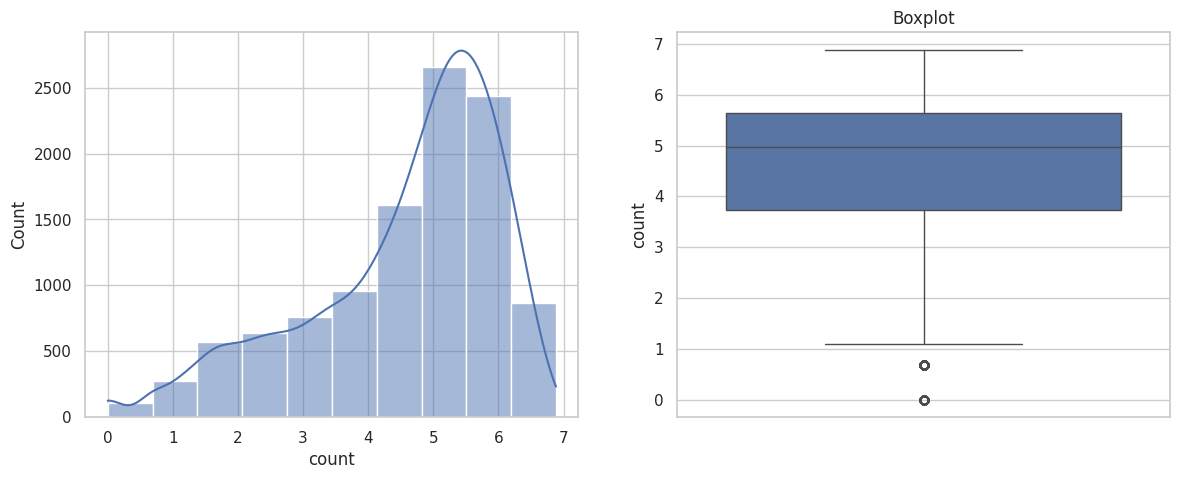

In [ ]:
# Our goal is to convert the count column using Log Transformation and then we will check the distribution.
plt.figure(figsize=(14, 5))# Histogram
plt.subplot(1, 2, 1)
sns.histplot(np.log(n['count']), kde = True,bins=10)
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(n['count']))# Bocplot
plt.title('Boxplot')
plt.show()

# Bivariate Analysis

Some questions to ask like:-

- Number of holidays and number of working days over seasons by year. ?
- Number of users per season. ?
- Trend Analysis for each year (month wise) i.e. 2011 & 2012. ?
- What affect does the weather do to the users. ?

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


Segregating data for each year, for easier analysis

In [ ]:
df11 = df[df['datetime'].dt.year == 2011] # data for 2011
df12 = df[df['datetime'].dt.year == 2012] # data for 2012

<Axes: xlabel='season'>

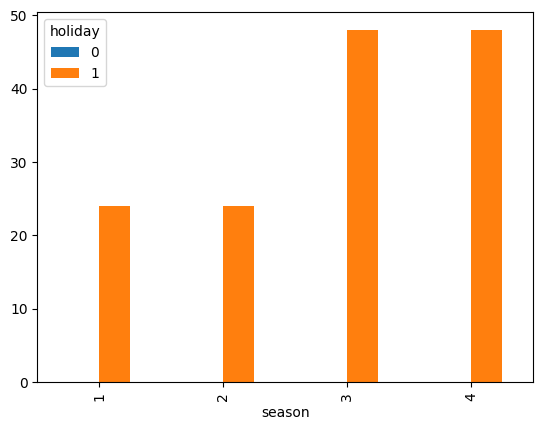

In [ ]:
df11.groupby(['season','holiday'])['holiday'].sum().unstack().plot(kind='bar')

<Axes: xlabel='season'>

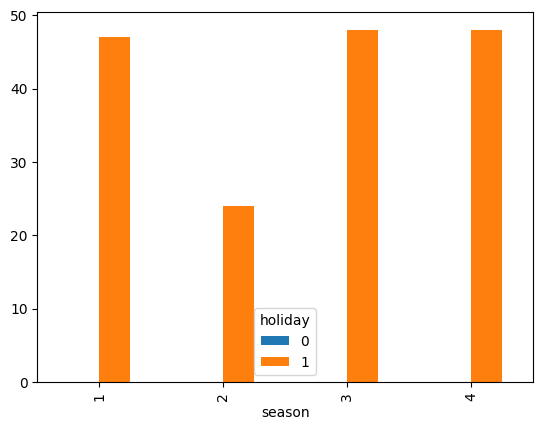

In [ ]:
df12.groupby(['season','holiday'])['holiday'].sum().unstack().plot(kind='bar')

Interesting,
- Their are more holidays in season 1 of 2012 than previous year.
- Season 3 & 4 have almost double the holiday when compared to season 1 & 2.

<Axes: xlabel='season'>

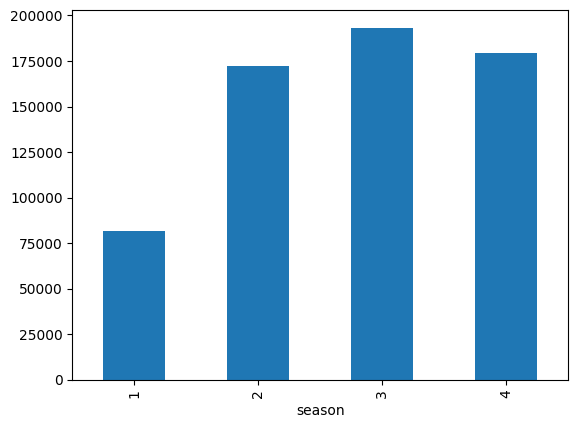

In [ ]:
df11.groupby(['season'])['registered'].sum().plot(kind='bar')

<Axes: xlabel='season'>

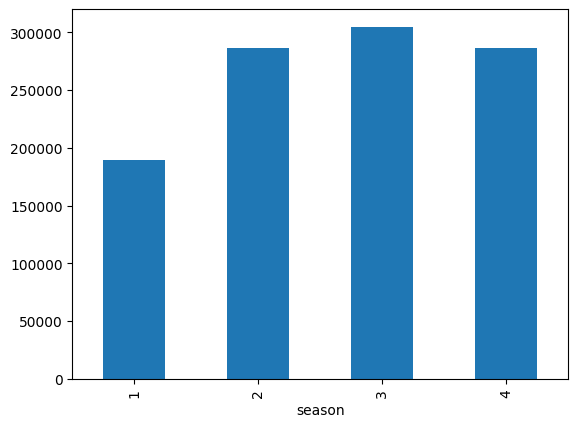

In [ ]:
df12.groupby(['season'])['registered'].sum().plot(kind='bar')

- Okay so, pattern looks similar for 2011 and 2012.
- Although their are more number of user's for 2012 each season.
- More registered user's are using the e-mobility in Fall season & winter, `*this is maybe due to more number of holidays in later season which in result showcasing an increasing in registered users.*`

In [ ]:
df11['month'] = df11['datetime'].dt.month

<ipython-input-7-c0f8c8fc3ee8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['month'] = df11['datetime'].dt.month


In [ ]:
a = df11.groupby(['month'])[['casual','registered']].sum()
a.reset_index()

,month,casual,registered
0,1,2008,21544
1,2,3776,29068
2,3,7910,30825
3,4,12229,38288
4,5,15865,63848
5,6,19600,70176
6,7,26145,66703
7,8,17580,65716
8,9,18311,60793
9,10,17159,62363


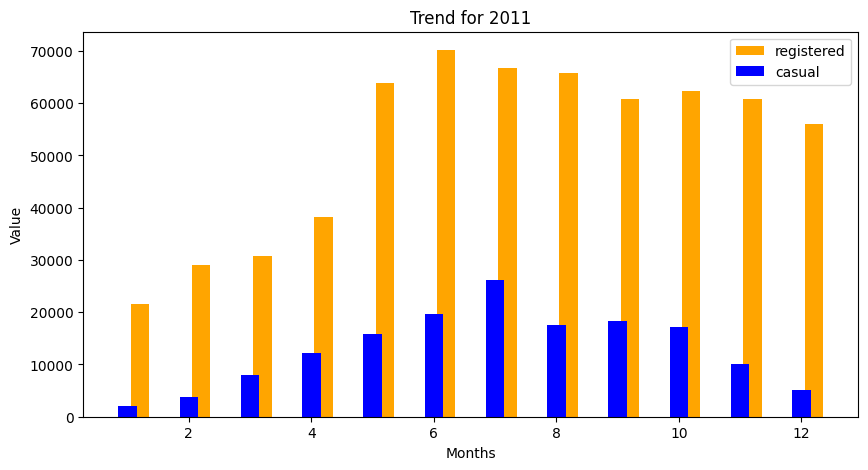

In [ ]:
# lets plot & check the trend for Number of Casual & Registered user.
# Groupedbar plot
plt.figure(figsize=(10,5))
width = 0.3
plt.bar(a.index+0.2, a['registered'], width,color = 'orange',label='registered')
plt.bar(a.index, a['casual'],width,color = 'blue',label='casual')
plt.title('Trend for 2011')
# Add labels and title
plt.xlabel('Months')
plt.ylabel('Value')
# Display the plot
plt.legend()
plt.show()

- Number of User's are increasing for 2011.
- Right after April, it reaches peak & then slowly tapper's off at end of year.
- Similar trend is for the casual users.

In [ ]:
# Lets check same for 2012
df12['month'] = df12['datetime'].dt.month

<ipython-input-10-6108ca0dd17d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['month'] = df12['datetime'].dt.month


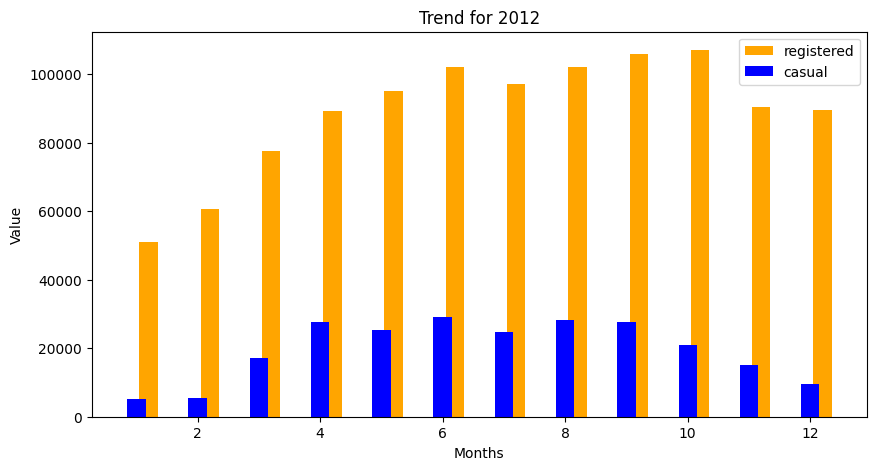

In [ ]:
b = df12.groupby(['month'])[['casual','registered']].sum()
b.reset_index()
plt.figure(figsize=(10,5))
width = 0.3
plt.bar(b.index+0.2, b['registered'], width,color = 'orange',label='registered')
plt.bar(b.index, b['casual'],width,color = 'blue',label='casual')

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Value')
# Display the plot
plt.title('Trend for 2012')
plt.legend()
plt.show()

- Similar trend to previous data, number of registered users start much higher almost `2x`.
- It gains peak during `september` and starts slowing tappering off.

<Axes: xlabel='weather'>

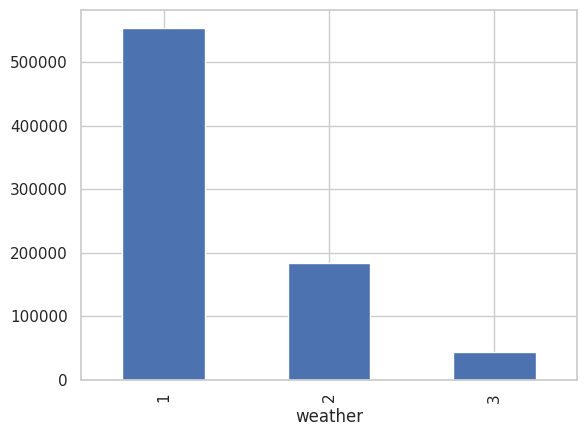

In [ ]:
df11.groupby(['weather'])['count'].sum().plot(kind='bar')

### Does weather affect the number of user's. ?

#### Let's start with creating Null Hypothesis:
$H_0:$ The average no. of bike rides in different weather conditions  are equal.

$H_a:$ The average no. of bike rides in different weather conditions are not equal.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

#### Let's see how data looks like

In [ ]:
a = df11.groupby(['weather'])['count'].sum()
a.reset_index()
a = pd.DataFrame(a)

In [ ]:
b = df12.groupby(['weather'])['count'].sum()
b.reset_index()
b = pd.DataFrame(b)

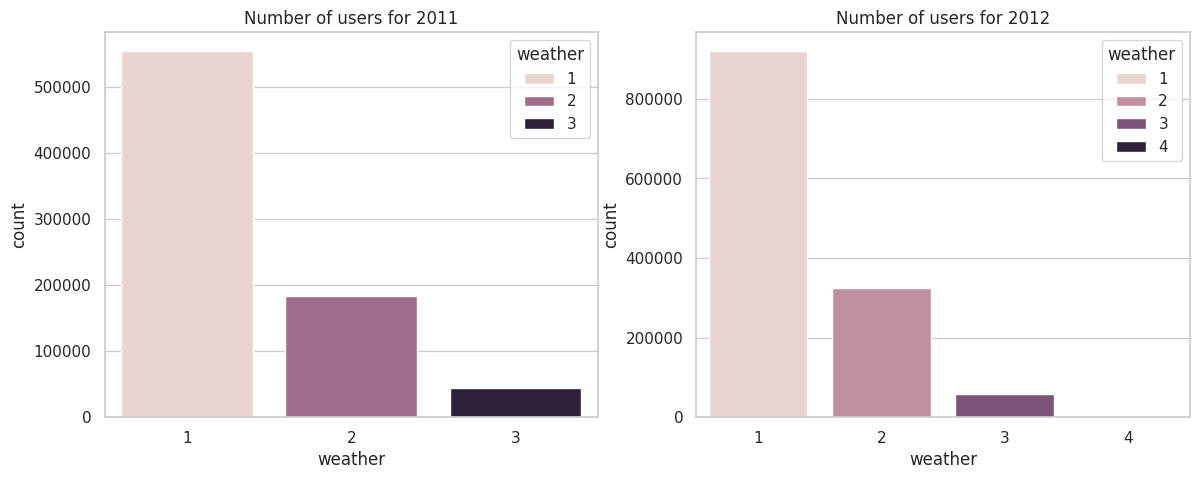

In [ ]:
plt.figure(figsize=(14, 5))# Histogram
plt.subplot(1, 2, 1)
sns.barplot(x = a.index, y = a['count'],hue = a.index)
plt.title('Number of users for 2011')
plt.subplot(1, 2, 2)
sns.barplot(x = b.index, y = b['count'],hue = b.index)
plt.title('Number of users for 2012')
plt.show()

In [ ]:
d = dt[~(dt['weather']==4)]
w1 = d[d['weather'] == 1]['count'].sample(750)
w2 = d[d['weather'] == 2]['count'].sample(750)
w3 = d[d['weather'] == 3]['count'].sample(750)

In [ ]:
d.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


This is a problem, concerning three independent population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population variance of the groups are all equal.

### Let's check for Normality using CLT

1. Using Histogram

2. To check the variance of samples

<Axes: xlabel='count', ylabel='Count'>

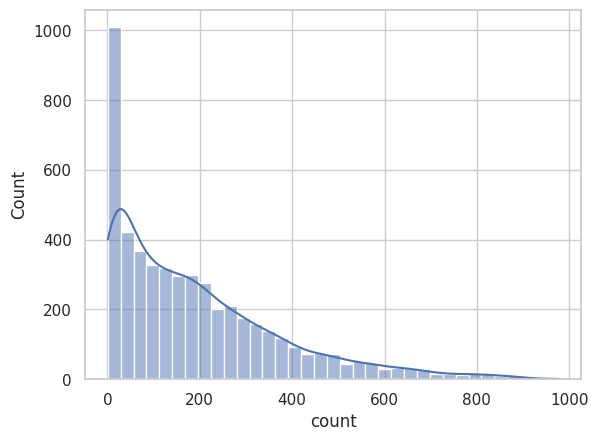

In [ ]:
sns.histplot(d['count'].sample(4999),kde=True)
# we can see the bell right skewed data

In [ ]:
print(w1.var(), w2.var(), w3.var())

36058.33364307966 29252.87089452603 19064.32870315977


by default we will use significance level at 5%(0.05).

In [ ]:
def result(p_value, alpha):
    if p_value < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')

In [ ]:
from scipy.stats import f_oneway # One-way ANOVA
alpha = 0.05
test_stat, p_value = f_oneway(w1, w2, w3)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  5.0045829606339034e-20
Reject the null hypothesis


Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different weather conditions are not equal.

### How does workingday & holiday affect the user's. ?

#### Let's visualise the data ffirst

In [ ]:
a = df11.groupby(['workingday'])['count'].sum()
a.reset_index()
a = pd.DataFrame(a)

In [ ]:
b = df12.groupby(['workingday'])['count'].sum()
b.reset_index()
b = pd.DataFrame(b)

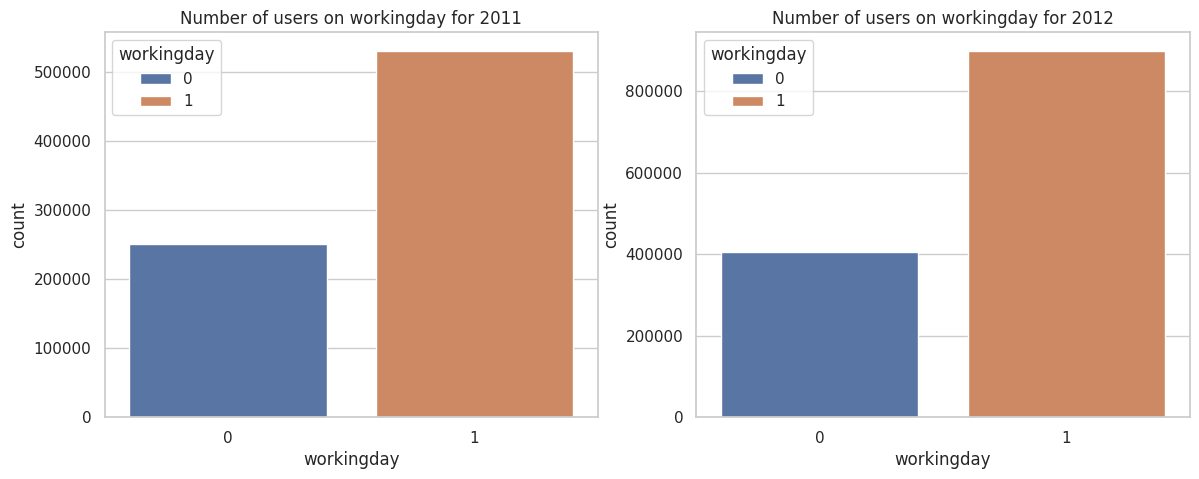

In [ ]:
plt.figure(figsize=(14, 5))# Histogram
plt.subplot(1, 2, 1)
sns.barplot(x = a.index, y = a['count'],hue = a.index)
plt.title('Number of users on workingday for 2011')
plt.subplot(1, 2, 2)
sns.barplot(x = b.index, y = b['count'],hue = a.index)
plt.title('Number of users on workingday for 2012')
plt.show()

So, on working day's their is a increase in number of user or so this is appearing.
Let's prove this using Null Hypothesis testing --

Now, let's start with Hypothesis:

$H_0:$ The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.

$H_a:$ The demand of bikes on weekdays is less than the demand of bikes on weekend.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 >= \mu_2$

$H_a: \mu_1 < \mu_2$

We will be using T-test for this scenario, using 2 way test. generally speaking T-test is used when the sample size is very small; When the sample size increases the T-test value will approach toward the Z-test value.

In [ ]:
weekday = d[d['workingday'] == 1]['count'].sample(2999)
weekend = d[d['workingday'] == 0]['count'].sample(2999)

In [ ]:
print('The sample standard deviation of the bike rides on weekday is:', round(weekday.std(), 2))
print('The sample standard deviation of the bike rides on weekend is:', round(weekend.std(), 2))

The sample standard deviation of the bike rides on weekday is: 180.76
The sample standard deviation of the bike rides on weekend is: 173.73


So the Std. Dev. are differenct, so population std. can also be assumed to be different.

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

In [ ]:
# As alpha is not given, we are taking default value of 0.05
alpha = 0.05

In [ ]:
test_stat, p_value = ttest_ind(weekday, weekend, equal_var=False, alternative='less')
print('The p-value is : ', p_value)

result(p_value, alpha)
# as the P-value is greater than significance value.

The p-value is :  0.8244414674395049
Fail to reject the null hypothesis


### Is demand of bicycle same for different seasons ?

Null Hypothesis:

$H_0:$ The average no. of bike rides in different seasons  are equal.

$H_a:$ The average no. of bike rides in different seasons are not equal.

In [ ]:
s1 = d[d['season'] == 1]['count'].sample(2399)
s2 = d[d['season'] == 2]['count'].sample(2399)
s3 = d[d['season'] == 3]['count'].sample(2399)
s4 = d[d['season'] == 3]['count'].sample(2399)

In [ ]:
d.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


We have already performed tests for normality and homogeneity of variance. So we will be directly moving onto the One-way ANOVA test.

In [ ]:
test_stat, p_value = f_oneway(s1, s2, s3, s4)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  7.128141106057341e-149
Reject the null hypothesis


Hence, we have enough statistical evidence to say that the average no. of bike rides in different seasons are not equal.

# Insights from analysis:

1. The no. of bikes rented on weekdays is comparatively higher than on weekends.
2. The no. of bikes rented on regular days is comparatively higher than on holidays.
2. The demand of bicycles on rent differs under different weather conditions.
3. The demand of bicycles on rent is different during different seasons.
4. The weather conditions are surely dependent upon the ongoing season.


Actionable insgihts:
- The demand for rent is higher on weekdays & regular days.
- The chances of person renting bike are higher during weather condition 1.